# Chem 30324, Spring 2018, Homework3
Due February 9, 2018

## Blackbody radiators.
By treating the sun as a blackbody radiator, Joseph Stefan derived the first reliable estimate of the temperature of the sun’s surface.

### 1. Stefan estimated that the power per unit area radiated from the surface of the sun was 43.5 times greater than that of a metal bar heated to 1950 ̊C. What is the temperature of the sun?

In [1]:
T_metal = 1950+273 # K 
n = 43.5
T_sun = (n*T_metal**4)**0.25 # K, Stefan-Boltzmann Law
print("The temperature of the sun is {:.3f} K.".format(T_sun))

The temperature of the sun is 5709.023 K.


### 2. Based on this temperature, what wavelength $\lambda$ of light does the sun emit most intensely, in nm? What frequency of light, in s^–1? What color does this correspond to?

In [2]:
W_cons = 2897768 # nm*k, Wien's Law
lam_max = W_cons/T_sun # nm
c = 2.99792e8 # m/s
nu = c/(lam_max*1e-9) # s^-1
print('The wavelength of light that the sun emits most intensely is {0:.3f} nm, the frequency is {1:0.3E} s^-1.'.format(lam_max,nu))
print('This is green light.')

The wavelength of light that the sun emits most intensely is 507.577 nm, the frequency is 5.906E+14 s^-1.
This is green light.


### 3. What is the ultraviolet catastrophe, and what did Planck have to assume to circumvent it?

The classical physics theory regarding blackbody radiation predicted that an infinite amount of energy is emitted at small wavelengths, which makes no sense from the perspective of energy conservation. Because small wavelengths correspond to the ultraviolet end of the spectrum, this puzzle was known as the ultraviolet catastrophe.
Planck assumed that energy is quantized, which means electromagnetic radiation can only be emitted or absorbed in discrete energies.

## Photoelectric effect.
The photoelectric effect refers to the emission of electrons that is observed when light is shone on a metal. The effect was the clue that Einstein needed to illucidate the particulate nature of the interaction of light and matter.

### 4. You set up an experiment in which you shine light of varying intensity and constant frequency at a metal surface and measure the maximum kinetic energy of the emitted electrons. As an accomplished student of classical physics, you know that the energy contained in a wave is proportional to the square of its intensity. Based on this knowledge, sketch how you $expect$ the kinetic energy of the electrons to vary in the experiment. Briefly justify your answer.

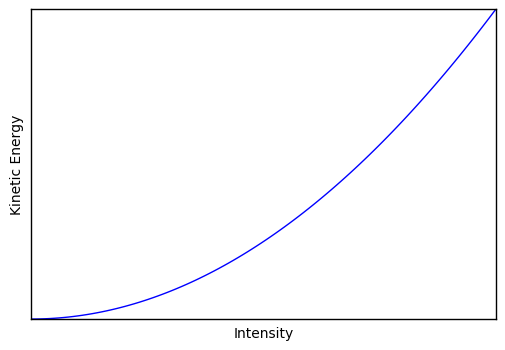

In [1]:
import numpy as np
import matplotlib.pyplot as plt

I = np.linspace(0,100,100) # intensity square
KE = I*I # Kinetic energy = energy of the wave = constant*intensity square
plt.plot(I,KE)
plt.xlabel('Intensity')
plt.ylabel('Kinetic Energy')
plt.xticks([])
plt.yticks([])
plt.show()

### 5. Not finding a result that you like, you set up another experiment in which you vary the frequency of light at constant intensity. Below is the data you collect. Use graphical analysis to determine the workfunction of the metal, in eV, and to estimate Planck’s constant.

|Light Wavelength (nm)|Electron Kinetic Energy (eV)|
|:-:|:-:|
|263|0.13|
|250|0.33|
|234|0.68|
|218|1.08|
|184|2.13|

The workfunction of the metal is 4.598 eV.
The Planck's constant is 4.127E-15 eV*s.


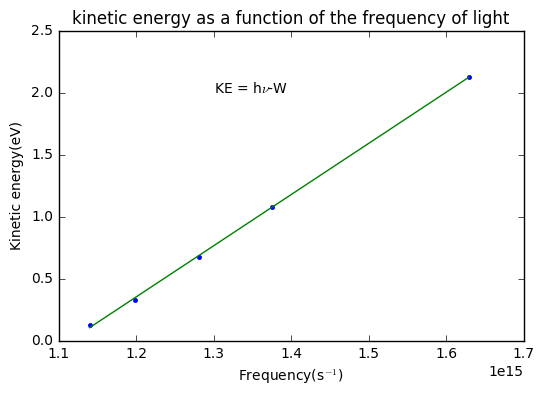

In [4]:
import numpy as np
import matplotlib.pyplot as plt

c = 2.99792e8 # m/s
wavelength = [263,250,234,218,184] # nm
KE = [0.13,0.33,0.68,1.08,2.13] # eV
frequency = []
for i in wavelength:
    frequency.append(c/(i*1.0e-9)) # s^-1, frequency = c/wavelength

h, W = np.polyfit(frequency, KE, 1) # linear fitting
KE_fit = np.poly1d([0,h,W]) # A one-dimensional polynomial class
print ('The workfunction of the metal is {0:.3f} eV.\nThe Planck\'s constant is {1:.3E} eV*s.'.format(-W,h))
plt.plot(frequency, KE, '.')
plt.plot(frequency, KE_fit(frequency), '-')
plt.xlabel('Frequency(s$^{-1}$)')
plt.ylabel('Kinetic energy(eV)')
plt.text(1.3e15,2.0,'KE = h$\\nu$-W')
plt.title('kinetic energy as a function of the frequency of light')
plt.show()

### 6. What is the metal? $Hint:$ It is a coinage metal.

See e.g. http://dx.doi.org/10.1103/PhysRevB.46.7157 for a tabulation of workfunctions. Values depend on the metal and on the specific crystal face.  The metal is in the range expected for copper or silver. 

A similar effect can be used to eject core electrons from atoms, using photons in the x-ray range (so-called x-ray photoelectron spectroscopy, or XPS). This method is the modern preferred way to identify elements in a substance through the photoelectric effect.

## Diffraction.
Diffraction is the scattering of particles off of a crystal, and is today an essential means of probing the structure of matter. Modern diffraction is performed using bright light and particle sources of various types.

### 7. The spacing between atoms in a Ag crystal is approximately 2.9 Å, a distance that can be measured by scattering photons of a comparable wavelength off the crystal. What is the energy (in eV) of a photon of wavelength 2.9 Å? What part of the electromagnetic spectrum does this correspond to?

In [3]:
hc = 1240 # eV*nm
wavelength = 0.29 # nm
E = hc/wavelength # eV
print ('The energy of the photon is {:.2f} eV, it corresponds to X-rays.'.format(E))

The energy of the photon is 4275.86 eV, it corresponds to X-rays.


### 8. Suppose you have a device that produces these photons at a power of 1 μW. How many photons/s does this correspond to?

In [4]:
P = 1e-6*6.2415e18 # eV/s, power
n = P/E # s^-1
print ('It corresponds to {:.5E} photons/s.'.format(n))

It corresponds to 1.45971E+09 photons/s.


### 9. The Ag spacing can also be measured by scattering $electrons$ off a crystal. To what speed (in m/s) would an electron need to be accelerated to have the necessary de Broglie wavelength? What fraction of the speed of light is this?

In [9]:
me = 9.109e-31 # kg
h = 6.62607e-34 # J*s
c = 2.99792e8 # m/s
p = h/(wavelength*1e-9) # kg*m/s
v = p/me # m/s
print ("The speed of the electron is {0:.5E} m/s.\nIt is {1:.5f} of the speed of light.".format(v,v/c))

The speed of the electron is 2.50835E+06 m/s.
It is 0.00837 of the speed of light.


## The Bohr atom. 
Bohr developed the first successful model of the energy spectrum of a hydrogen atom by postulating that electrons can only exist in certain fixed energy “orbits” indexed by the quantum number $n$. (Recall that the equations describing the Bohr atom are in Table 4 of the course outline.)

### 10. Calculate the energies of an electron in the $n$ = 1 and $n$ = 2 orbits, in eV.

In [8]:
EH = 27.212 # eV
n1 = 1
n2 = 2
E1 = -EH/2/n1**2 # eV
E2 = -EH/2/n2**2 # eV
print ('The energies of an electron in the n=1 and n=2 orbits are {0:.3f} eV and {1:.3f} eV.'.format(E1,E2))

The energies of an electron in the n=1 and n=2 orbits are -13.606 eV and -3.401 eV.


### 11. Would light need to be absorbed or emitted to cause an electron to jump from the $n$ = 1 to the $n$ = 2 orbit? What wavelength of light does this correspond to?

In [9]:
hc = 1240 # eV*nm
deltaE = E2-E1 # eV
wavelength = hc/deltaE # nm
print ('Light needs to be absorbed to cause an electron to jump from the n=1 to n=2 orbit. \nThe wavelength is {:.5f} nm.'.format(wavelength))


Light needs to be absorbed to cause an electron to jump from the n=1 to n=2 orbit. 
The wavelength is 121.51502 nm.


### 12. What is the circumference of the $n$ = 2 orbit? What is the de Broglie wavelength of an electron in the $n$ = 2 orbit? How do these compare?

In [15]:
import numpy as np
a0 = 0.529177e-10 # m 
r2 = a0*n2**2 # m
l = 2*np.pi*r2 # m, circumference

k = 2.30708e-28 # J*m, k = e^2/(4*pi*epsilon), the value of the constant is in the course outline.
me = 9.109e-31 # kg
h = 6.62607e-34 # J*s
hbar = 1.05457e-34 #J*s, reduced Planck constant
p0 = k*me/hbar # kg*m/s
p2 = p0/n2
wavelength_2 = h/p2 # m
print('The circumference of the n=2 orbit is {0:.5E} m. \nThe de Broglie wavelength of an electron in the n=2 orbit is {1:.5E} m. \nThe relationship is the circumference={2:.2f}*the de Broglie wavelength.'.format(l,wavelength_2,l/wavelength_2))


The circumference of the n=2 orbit is 1.32997E-09 m. 
The de Broglie wavelength of an electron in the n=2 orbit is 6.65010E-10 m. 
The relationship is the circumference=2.00*the de Broglie wavelength.
